In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
!ls /content/drive

MyDrive


In [45]:
!ls /content/drive/MyDrive/

 CodeCommit-Repos.zip				      Passport.pdf
'Copy of VID_20151021_172916042.mp4'		      PrasannaKumar-F1
 Creds.gdoc					     'PrasannaKumar-I94 - Official Website.pdf'
 DOC000.pdf					     'PrasannaKumar Reddy Chirra-1-18.pdf'
 google_colab					     'PrasannaKumar Reddy Chirra.pdf'
 Hari-Wedding					     'PRASANNA KUMAR REDDY.pdf'
'Networth Certificate-Prasanna Reddy-Xerox (1).pdf'   PrasannaKumar_Resume.docx
 OneDrive_2_7-10-2023				      SSN.pdf


In [46]:
!ls -lrt /content/drive/MyDrive/google_colab/

total 1891
-rw------- 1 root root   6483 Jan 24 19:05 'KNN Implementation.ipynb'
-rw------- 1 root root 207515 Jan 27 04:12  Assignment_2.ipynb
-rw------- 1 root root    324 Jan 27 04:12  Untitled0.ipynb
-rw------- 1 root root  16864 Jan 27 04:15  KNN_Assignment2.ipynb
-rw------- 1 root root    223 Feb  2 15:51  Untitled1.ipynb
-rw------- 1 root root 857615 Feb  2 16:35  Assignment_3.ipynb
-rw------- 1 root root  13513 Feb  7 18:34  Untitled2.ipynb
-rw------- 1 root root 375781 Feb  9 17:26  Assignment4_ML.ipynb
drwx------ 2 root root   4096 Feb 14 18:40  kaggle_linear_regression_data
-rw------- 1 root root 451831 Feb 15 05:25  Assignment_5.ipynb


In [47]:
!ls /content/drive/MyDrive/google_colab/kaggle_linear_regression_data/

readme.md  test.csv  train.csv


In [48]:
!head /content/drive/MyDrive/google_colab/kaggle_linear_regression_data/test.csv

x,y
77,79.77515201
21,23.17727887
22,25.60926156
20,17.85738813
36,41.84986439
15,9.805234876
62,58.87465933
95,97.61793701
20,18.39512747


In [49]:
!head /content/drive/MyDrive/google_colab/kaggle_linear_regression_data/train.csv

x,y
24,21.54945196
50,47.46446305
15,17.21865634
38,36.58639803
87,87.28898389
36,32.46387493
12,10.78089683
81,80.7633986
25,24.61215147


In [50]:
import pandas as pd
df_train =pd.read_csv("/content/drive/MyDrive/google_colab/kaggle_linear_regression_data/train.csv")
df_test =pd.read_csv("/content/drive/MyDrive/google_colab/kaggle_linear_regression_data/test.csv")
df_train

x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]

In [51]:
#remove code that contains null values
df_train = df_train.dropna()
df_test=df_test.dropna()
df_train

x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]

In [52]:
#preparing data for training and testing
x_train=df_train['x']
y_train=df_train['y']
x_test=df_test['x']
y_test=df_test['y']

#check shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

(699,)
(699,)
(300,)
(300,)


In [53]:
#data normalization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train= scaler.transform(x_train)
scaler=preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

Text(0.5, 1.0, 'Train Set')

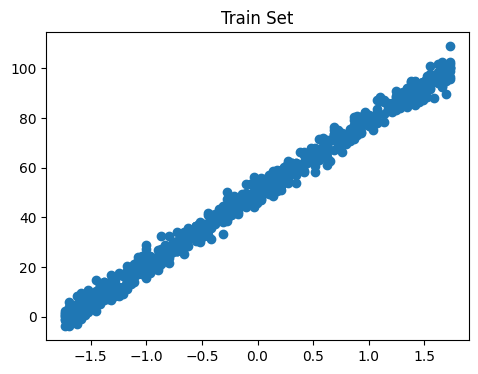

In [54]:
#Data Visualization
import matplotlib.pyplot as plt
plt.figure (figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x_train,y_train)
plt.title('Train Set')

In [55]:
plt.figure (figsize=(12,4))
plt.subplot(1,2,2)
plt.scatter(x_test,y_test)
plt.title('Test Set')

Text(0.5, 1.0, 'Test Set')

In [42]:
from numpy.lib import polynomial
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Define the degree of the polynomial features
degree = 1

# Initialize PolynomialFeatures with the specified degree
polynomial_features = PolynomialFeatures(degree=degree)

# Transform the training data to polynomial features
x_poly = polynomial_features.fit_transform(x_train)

# Print a subset of the transformed training data
print(x_poly [1:4, :])

# Transform the test data using the same PolynomialFeatures instance
x_test_poly = polynomial_features.transform(x_test)

# Print a subset of the transformed test data
print(x_test_poly[1:4, :])

[[ 1. 50.]
 [ 1. 15.]
 [ 1. 38.]]
[[ 1. 21.]
 [ 1. 22.]
 [ 1. 20.]]


In [ ]:
#Polynomial Regression Model
model=LinearRegression()
# Fit the polynomial regression model to the training data
model.fit(x_poly, y_train)

# Predict the target variable for the training data
y_pred_train = model.predict(x_poly)

# Calculate and print the training error (Mean Squared Error)
print('Train error:', mse(y_train, y_pred_train))

# Plot the training data and the polynomial regression model
plt.figure(figsize=(12, 4))
plt.scatter(x_train, y_train)
# Sort the predicted values for plotting
sorted_zip_train = sorted(zip(x_train, y_pred_train), key=operator.itemgetter(0))
xs_train, ys_pred_train = zip(*sorted_zip_train)
plt.plot(xs_train, ys_pred_train, color='y')
plt.title('Polynomial Regression Train Set')
plt.show()

Train error: 7.867752733487689


Test error: 9.164287860614264


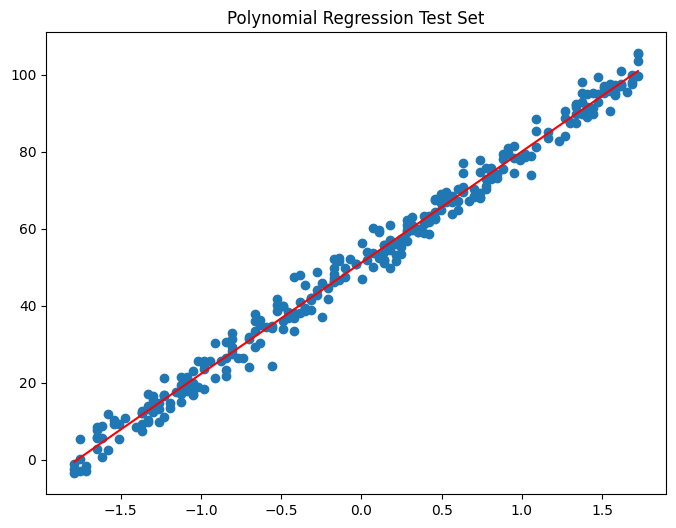

In [62]:
# Fit the polynomial regression model to the test data
model = LinearRegression()
model.fit(x_test_poly, y_test)

# Predict the target variable for the test data
y_pred_test = model.predict(x_test_poly)

# Calculate and print the test error (Mean Squared Error)
print('Test error:', mse(y_test, y_pred_test))

# Plot the test data and the polynomial regression model
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test)
# Sort the predicted values for plotting
sorted_zip_test = sorted(zip(x_test, y_pred_test), key=operator.itemgetter(0))
xs_test, ys_pred_test = zip(*sorted_zip_test)
plt.plot(xs_test, ys_pred_test, color='r')
plt.title('Polynomial Regression Test Set')
plt.show()

In [63]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Lasso regression model on train set
model = Lasso(alpha=0.1)
model.fit(x_poly, y_train)
y_pred = model.predict(x_poly)
print('Train error:', mse(y_train, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train)

# Sort the values
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train, y_pred), key=sort_axis)
xs_train, ys_pred = zip(*sorted_zip)

plt.plot(xs_train, ys_pred, color='y')
plt.title('Lasso Regression Train Set')
plt.show()

Train error: 7.867764678533158


In [65]:
# Ridge regression model on train set
model = Ridge(alpha=0.1)
model.fit(x_poly, y_train)
y_pred = model.predict(x_poly)
print('Train error:', mse(y_train, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train)

# Sort the values
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train, y_pred), key=sort_axis)
xs_train, ys_pred = zip(*sorted_zip)

plt.plot(xs_train, ys_pred, color='b')
plt.title('Ridge Regression Train Set')
plt.show()

Train error: 7.867752733512167


In [66]:
# ElasticNet regression model on train set
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(x_poly, y_train)
y_pred = model.predict(x_poly)
print('Train error:', mse(y_train, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train)

# Sort the values
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train, y_pred), key=sort_axis)
xs_train, ys_pred = zip(*sorted_zip)

plt.plot(xs_train, ys_pred, color='r')
plt.title('ElasticNet Regression Train Set')
plt.show()

Train error: 7.867764684947305


Test error: 9.164300209556007


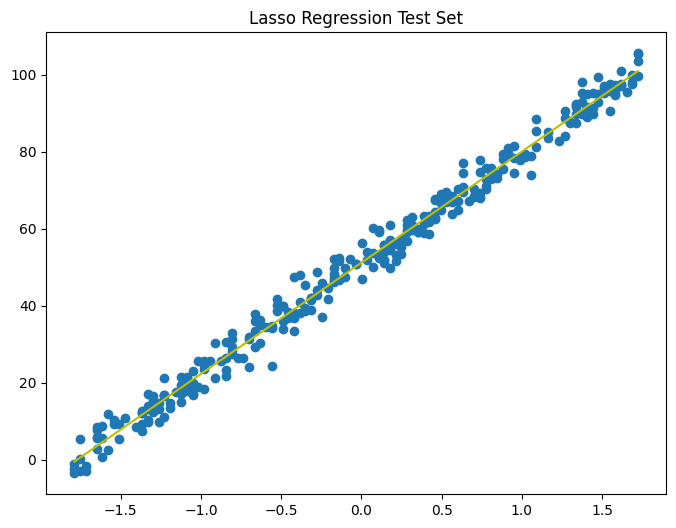

In [69]:
# Lasso regression model on test set
model = Lasso(alpha=0.1)
model.fit(x_test_poly, y_test)
y_pred = model.predict(x_test_poly)
print('Test error:', mse(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test)

# Sort the values
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test, y_pred), key=sort_axis)
xs_test, ys_pred = zip(*sorted_zip)

plt.plot(xs_test, ys_pred, color='y')
plt.title('Lasso Regression Test Set')
plt.show()

Test error: 9.164287860755442


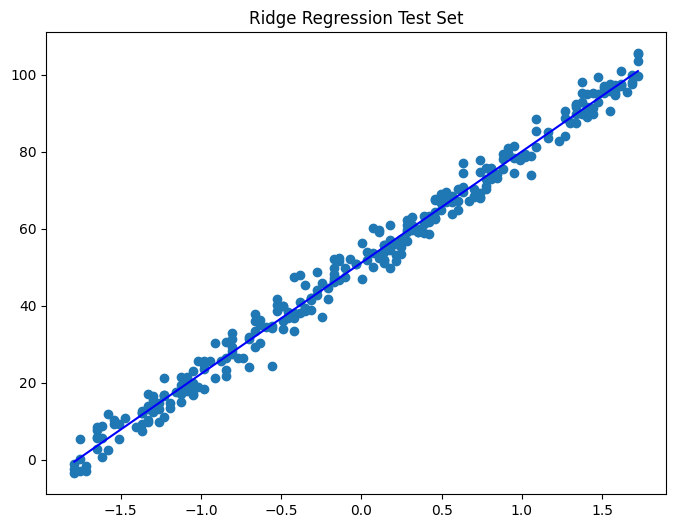

In [68]:
# Apply L2 regularization using Ridge with test set
model = Ridge(alpha=0.1)
model.fit(x_test_poly, y_test)
y_pred = model.predict(x_test_poly)
print('Test error:', mse(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test)

# Sort the values
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test, y_pred), key=sort_axis)
xs_test, ys_pred = zip(*sorted_zip)

plt.plot(xs_test, ys_pred, color='b')
plt.title('Ridge Regression Test Set')
plt.show()

In [67]:

# Apply ElasticNet regularization using test set
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(x_test_poly, y_test)
y_pred = model.predict(x_test_poly)
print('Test error:', mse(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test)

# Sort the values
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test, y_pred), key=sort_axis)
xs_test, ys_pred = zip(*sorted_zip)

plt.plot(xs_test, ys_pred, color='r')
plt.title('ElasticNet Regression Test Set')
plt.show()

Test error: 9.164300385670149
